In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def img_read_resize(files):
    img = cv2.imread(files,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, dsize=(120, 90), interpolation=cv2.INTER_AREA)
    return img

DIR = 'C:/Users/ADmin/Desktop/drum_instrument_original/Bass/'
fnames = os.listdir(DIR)
a = fnames.index("2.JPG")

f = fnames[a]
img = img_read_resize(DIR+f)

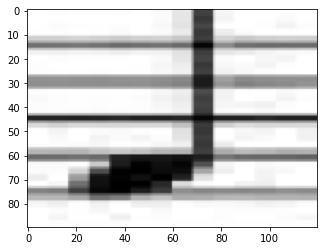

In [38]:
plt.imshow(img, cmap='gray')

In [65]:
sobely = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)
print(sobely)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 336. 336. 336.]
 [  0.   0.   0. ... 176. 176. 176.]
 [  0.   0.   0. ...   0.   0.   0.]]


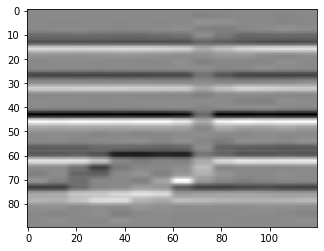

In [64]:
plt.imshow(sobely, cmap='gray')

In [34]:
import imgaug.augmenters as aug

In [35]:
seq_0_1 = aug.Crop(px=(10,10))
seq_1_0 = aug.Crop(px=(20,20))
seq_1_1 = aug.Crop(px=(30,30))

In [36]:
im_0_1 = seq_0_1.augment_images(img)
im_1_0 = seq_1_0.augment_images(img)
im_1_1 = seq_1_1.augment_images(img)

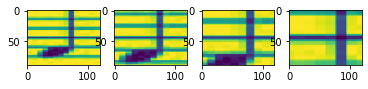

In [37]:
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(im_0_1)
plt.subplot(1,4,3)
plt.imshow(im_1_0)
plt.subplot(1,4,4)
plt.imshow(im_1_1)

In [329]:
diff = im_1_1 - img

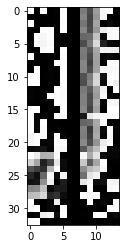

In [330]:
plt.imshow(diff)

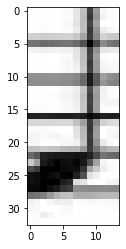

In [320]:
crop = aug.Crop(px=(3,3))
im = crop.augment_images(img)
plt.imshow(im)

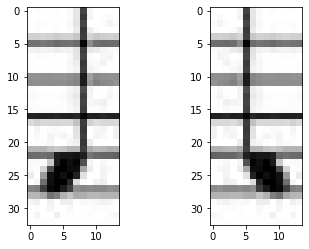

In [324]:
flip = aug.Fliplr(1)
im = flip.augment_image(img)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(im)

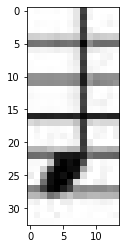

In [334]:
blur = aug.GaussianBlur(sigma=(0.0, 0.0))
im = blur.augment_images(img)

plt.imshow(im)

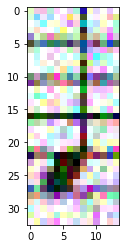

In [339]:
noise = aug.AdditiveGaussianNoise(scale=0.2*255)
im = noise.augment_images(img)

plt.imshow(im)

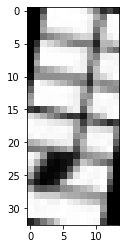

In [384]:
rotate = aug.Rotate((10,10))
im = rotate.augment_images(img)

plt.imshow(im,cmap='gray')

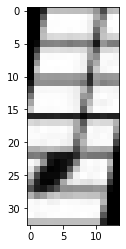

In [385]:
shear = aug.ShearX((10,10))
#im = shear.augment_images(img_resiz)
img_aug_1 = shear(images=img)
plt.imshow(img_aug_1,cmap='gray')